<a href="https://colab.research.google.com/github/SharovarovAleksandr/Academy/blob/main/Diplom/Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Створення прогностичних моделей для ринку Forex на базі валютних пар EUR/USD, GBP/CAD, EUR/GBP 

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from prophet import Prophet

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly import graph_objs as go
# import matplotlib.pyplot as plt
# %matplotlib inline

# import plotly
# import plotly.graph_objs as go

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Python/Data/GBPCAD_D1.csv', delimiter=';', index_col=0)
ticker='GBP/CAD'

df

,'time','open','high','low','close'
'index',,,,,
0,2004.03.12 00:00:00,2.38770,2.40920,2.36490,2.40410
1,2004.03.15 00:00:00,2.39740,2.41590,2.38810,2.40710
2,2004.03.16 00:00:00,2.40690,2.42110,2.40020,2.41460
3,2004.03.17 00:00:00,2.41490,2.43560,2.40620,2.43000
4,2004.03.18 00:00:00,2.43030,2.44640,2.42620,2.43460
...,...,...,...,...,...
5135,2023.03.10 00:00:00,1.64869,1.67061,1.64709,1.66325
5136,2023.03.13 00:00:00,1.66923,1.67418,1.66029,1.67270
5137,2023.03.14 00:00:00,1.67178,1.67350,1.65919,1.66338


In [ ]:
for i in df:
    df['atr']=df['High']-df['Low']
    df['hl_predict']=df['Open']-df['Close']
df

,Time,Open,High,Low,Close,atr,hl_predict
0,2023.03.07 00:00:00,1.63687,1.64223,1.62588,1.62642,0.01635,0.01045
1,2023.03.06 00:00:00,1.63654,1.63959,1.63289,1.63664,0.00670,-0.00010
2,2023.03.03 00:00:00,1.62363,1.63779,1.62300,1.63671,0.01479,-0.01308
3,2023.03.02 00:00:00,1.63489,1.63526,1.62394,1.62394,0.01132,0.01095
4,2023.03.01 00:00:00,1.63949,1.64515,1.63237,1.63488,0.01278,0.00461
...,...,...,...,...,...,...,...
1445,2017.08.09 00:00:00,1.64478,1.65335,1.64443,1.65072,0.00892,-0.00594
1446,2017.08.08 00:00:00,1.65185,1.65321,1.64103,1.64517,0.01218,0.00668
1447,2017.08.07 00:00:00,1.64866,1.65611,1.64806,1.65225,0.00805,-0.00359
1448,2017.08.04 00:00:00,1.65249,1.65505,1.64514,1.64887,0.00991,0.00362


In [ ]:
predict_num=2
mark='High'
train = pd.DataFrame()
test = pd.DataFrame()

train['ds']=df['Time'][predict_num:]
train['ds']=pd.to_datetime(train['ds'])
train['y']=df[mark][predict_num:]
test['ds']=df['Time'][:predict_num]
test['ds']=pd.to_datetime(test['ds'])
test['y']=df[mark][:predict_num]
train['hl_predict']=df['hl_predict'][predict_num:]
train

,ds,y,hl_predict
2,2023-03-03,1.63779,-0.01308
3,2023-03-02,1.63526,0.01095
4,2023-03-01,1.64515,0.00461
5,2023-02-28,1.65221,-0.00428
6,2023-02-27,1.63779,-0.01141
...,...,...,...
1445,2017-08-09,1.65335,-0.00594
1446,2017-08-08,1.65321,0.00668
1447,2017-08-07,1.65611,-0.00359
1448,2017-08-04,1.65505,0.00362


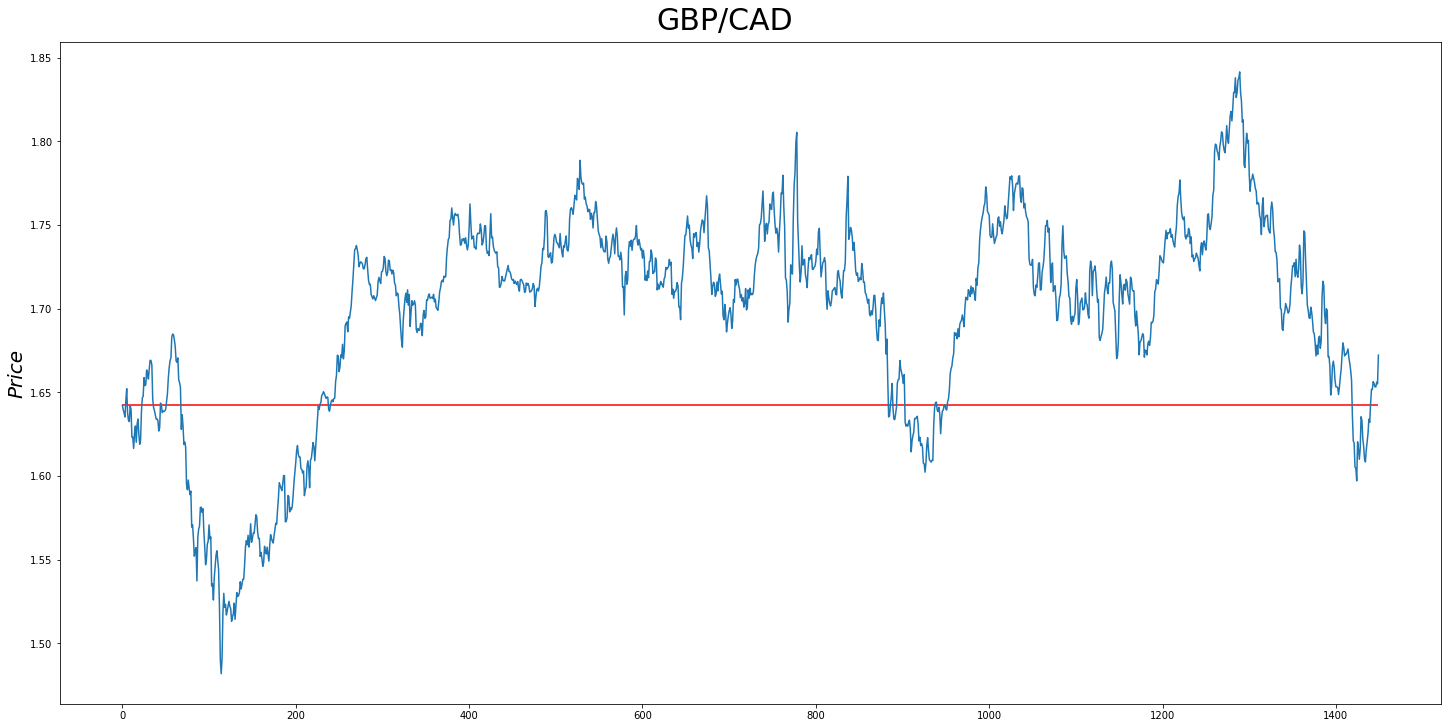

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), layout='constrained')
fig.suptitle(ticker, fontsize=30)
ax.set_ylabel('Price',  fontstyle='oblique', fontsize=20)
ax.hlines(df[mark][0], df.index[-1], df.index[0], color='red')
plt.plot(df[mark])


(array([ 1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  3.,  7.,  4.,
         3.,  4.,  5.,  0.,  3.,  5.,  7.,  5., 11., 13.,  5.,  9.,  4.,
         4.,  7.,  0.,  6.,  7.,  6.,  4.,  5.,  7., 16.,  2., 15., 13.,
        10.,  6., 12., 22., 23., 16., 18.,  9., 13., 17.,  8., 11.,  9.,
        23., 10.,  9., 19., 18., 17., 28., 27., 40., 34., 54., 67., 67.,
        70., 43., 45., 50., 45., 51., 42., 58., 39., 33., 35., 31., 22.,
        16., 14., 12., 10., 14.,  2.,  2.,  2.,  4.,  6.,  7.,  3.,  2.,
         3.,  2.,  2.,  0.,  2.,  4.,  0.,  1.,  3.]),
 array([1.48187  , 1.4854668, 1.4890636, 1.4926604, 1.4962572, 1.499854 ,
        1.5034508, 1.5070476, 1.5106444, 1.5142412, 1.517838 , 1.5214348,
        1.5250316, 1.5286284, 1.5322252, 1.535822 , 1.5394188, 1.5430156,
        1.5466124, 1.5502092, 1.553806 , 1.5574028, 1.5609996, 1.5645964,
        1.5681932, 1.57179  , 1.5753868, 1.5789836, 1.5825804, 1.5861772,
        1.589774 , 1.5933708, 1.5969676, 1.6005644, 1.6041612, 1

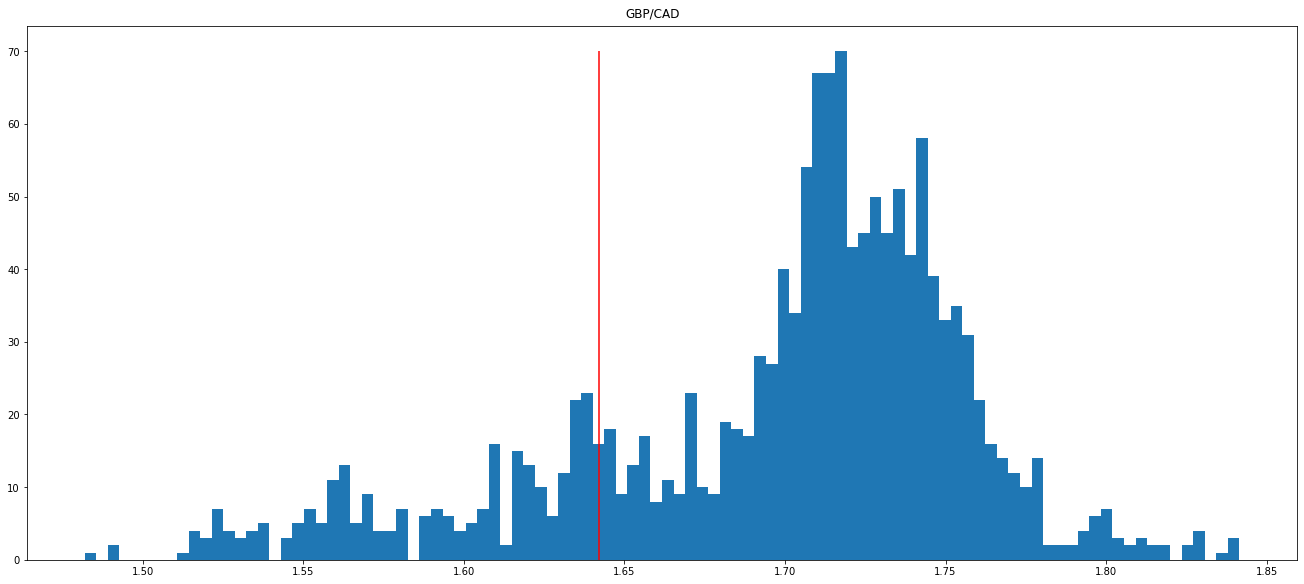

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8), layout='constrained')
fig.suptitle(ticker)
ax.vlines(df['High'][0], 0, 70, color='red')  # Last price of dataframe
plt.hist(df['High'],100)
# plt.plot()

In [ ]:
from holidays.financial import european_central_bank
import pandas as pd
import holidays

# Загрузка набора праздничных дней за последние 6 лет
canada_holidays = holidays.Canada(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
us_holidays = holidays.USA(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
gb_holidays=holidays.GB(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
eur_holidays=holidays.ECB(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
us_holidays_bank=holidays.NYSE(years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)
fin_holidays=holidays.financial_holidays('NYSE', years=[2017, 2018, 2019, 2020, 2021, 2022, 2023], observed=True)

# Преобразование в DataFrame
df_holidays_CA = pd.DataFrame(canada_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_usa = pd.DataFrame(us_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_gb = pd.DataFrame(gb_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_ECB = pd.DataFrame(eur_holidays.items(), columns=['Date', 'Holiday'])
df_holidays_NYSE = pd.DataFrame(us_holidays_bank.items(), columns=['Date', 'Holiday'])
df_holidays = pd.DataFrame(fin_holidays.items(), columns=['Date','Holiday'] )




In [ ]:
holidays_US = pd.DataFrame({
  'holiday': 'financial_NYSE',
  'ds': pd.to_datetime(df_holidays_NYSE['Date']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays_GB = pd.DataFrame({
  'holiday': 'financial_GB',
  'ds': pd.to_datetime(df_holidays_gb['Date']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays_CA = pd.DataFrame({
  'holiday': 'financial_CA',
  'ds': pd.to_datetime(df_holidays_CA['Date']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((holidays_US, holidays_GB, holidays_CA))
holidays

,holiday,ds,lower_window,upper_window
0,financial_NYSE,2017-01-02,0,1
1,financial_NYSE,2017-01-16,0,1
2,financial_NYSE,2017-02-20,0,1
3,financial_NYSE,2017-04-14,0,1
4,financial_NYSE,2017-05-29,0,1
...,...,...,...,...
82,financial_CA,2023-08-07,0,1
83,financial_CA,2023-09-04,0,1
84,financial_CA,2023-10-09,0,1
85,financial_CA,2023-12-25,0,1


In [ ]:
import plotly.express as px

df = px.data.gapminder().query("country=='Canada'")
fig = px.line(test, x='ds', y="y", title='GBP/CAD')
fig=px.line(train, x='ds', y="y", title='GBP/CAD')
fig.show()

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots()

fig.add_trace(go.Line(x=test['ds'], y=test['y']))

fig.add_trace(go.Line(x=train['ds'], y=train['y']))

fig.update_layout(height=800, width=1400)
fig.show()


/usr/local/lib/python3.9/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.api import ExponentialSmoothing
# from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# result = seasonal_decompose(train.high, model='additive', extrapolate_trend=10)
# plt.rcParams.update({'figure.figsize': (10,10)})
# result.plot().suptitle('Additive model')
# type(train)

In [ ]:
hps = 0.1   # holidays_prior_scale - коефіцієнт впливу свят
cr = 0.8    # changepoint_range - відсоток тестової вибірки яка враховує зміни поведінки 
            # Decreasing it will make the trend less flexible:
cps=0.05    # changepoint_prior_scale - сли изменения тренда являются переобученными
            # (слишком большая гибкость) или недостаточными (недостаточная гибкость), 
            # можете отрегулировать силу разреженного априорного значения.
            # По умолчанию этот параметр установлен на 0,05. Его увеличение сделает тренд более гибким:

model = Prophet(holidays=holidays_US, 
                holidays_prior_scale=10, 
                changepoint_range=0.9, 
                changepoint_prior_scale=0.05,
                yearly_seasonality = 'auto',
                weekly_seasonality = 'auto',
                daily_seasonality = 'auto',
                growth = 'linear', 
                n_changepoints = 25,
                changepoints = None,
                seasonality_mode = 'additive', 
                seasonality_prior_scale = 10, 
                mcmc_samples = 0, 
                interval_width = 0.8, 
                uncertainty_samples = 1000,
                stan_backend = None)
                
                
                
model.add_regressor('hl_predict')
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1xg4plmv/d33ck65g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1xg4plmv/8ncej0ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10218', 'data', 'file=/tmp/tmp1xg4plmv/d33ck65g.json', 'init=/tmp/tmp1xg4plmv/8ncej0ew.json', 'output', 'file=/tmp/tmp1xg4plmv/prophet_modelty80dc7i/prophet_model-20230318101506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=predict_num)
future.tail(5)
# forecast = model.predict(future)
# forecast

,ds
1445,2023-03-01
1446,2023-03-02
1447,2023-03-03
1448,2023-03-04
1449,2023-03-05


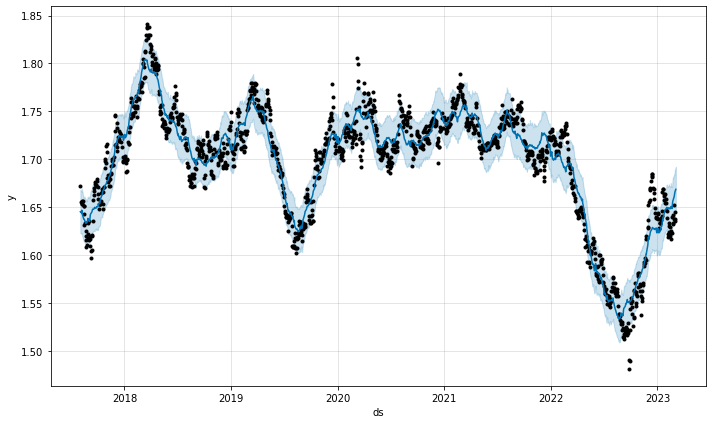

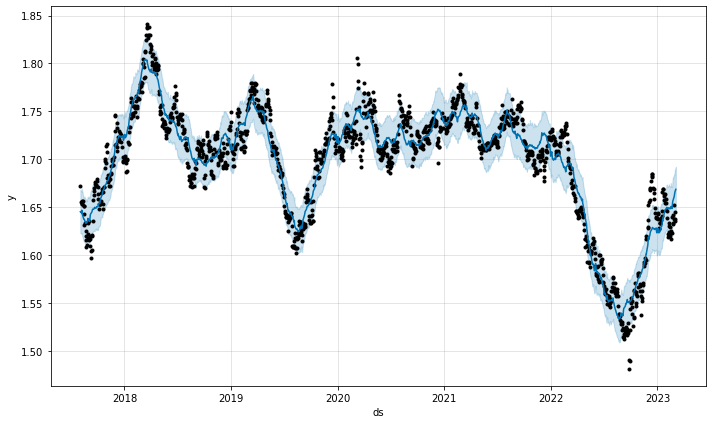

In [ ]:
model.plot(forecast)

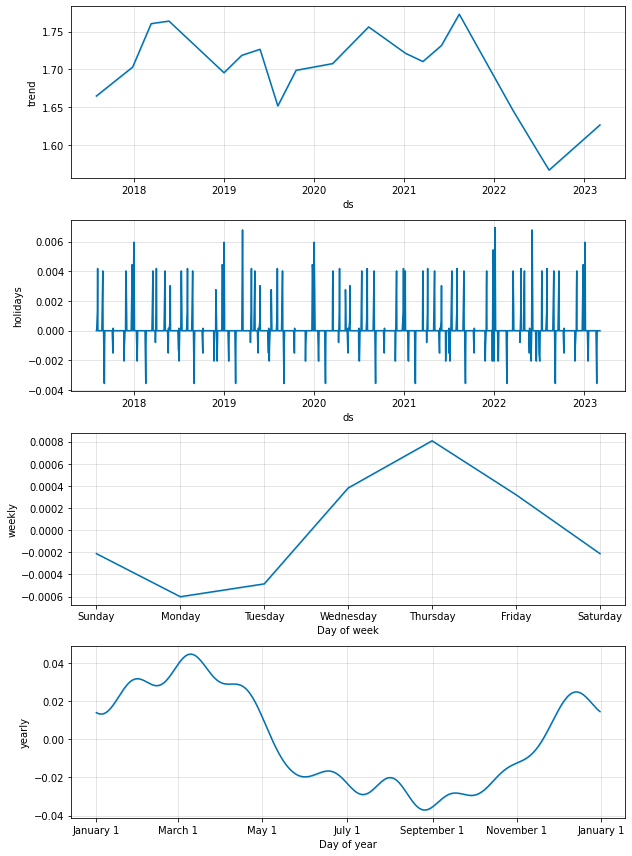

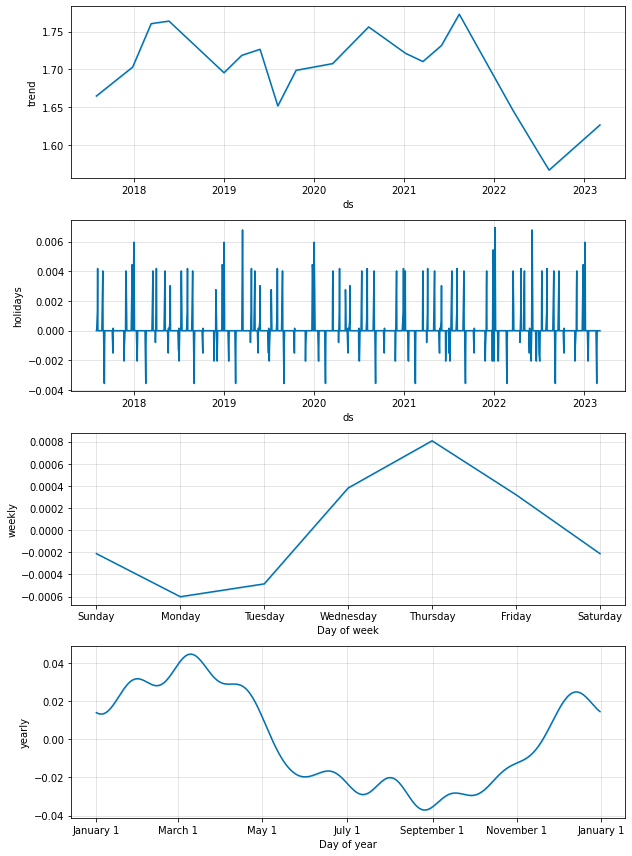

In [ ]:
model.plot_components(forecast)